In [1]:
##### Reddit message Code - works wit h10K file
###############################################
###############################################
###############################################
BLOCKING TO NOT RUN - WILL RUN 4-5 hours!!!
BLOCKING TO NOT RUN - WILL RUN 4-5 hours!!!
BLOCKING TO NOT RUN - WILL RUN 4-5 hours!!!
BLOCKING TO NOT RUN - WILL RUN 4-5 hours!!!
BLOCKING TO NOT RUN - WILL RUN 4-5 hours!!!
###############################################
###############################################
###############################################
###############################################

# Dependencies
import gmaps
import numpy as np
import pandas as pd

import requests
import json

import scipy.stats as st
from scipy.stats import linregress

from matplotlib import pyplot as plt

from pprint import pprint

from random import seed
from random import randint

# Time calculations
import time
import datetime
# from datetime import datetime
from time import strftime

# Printing and Output Controls
import sys
import os,csv

In [2]:
# Set up output path 
Output_Data_Path_Folder = "../Output" 
Reddit_Data_Input_Path = "../Data/r_wallstreetbets_posts_special.csv"

In [3]:
# read in the csv created in the WeatherPy section
reddit_data_df = pd.read_csv(Reddit_Data_Input_Path,dtype="object", encoding="latin",usecols=[1, 10, 12],nrows=368471)

In [4]:
# Check data
print(reddit_data_df.count())
# print(reddit_data_df.dtypes)
# reddit_data_df.head(2)

title           368470
num_comments    368471
Date Stamp      368471
dtype: int64


In [5]:
# reddit_data_df = reddit_data_df.drop(columns=['id', 'score','author','author_flair_text','removed_by','total_awards_received','awarders','created_utc','full_link','over_18'])
# reddit_data_df = reddit_data_df.drop(columns=['id', 'score','author','author_flair_text','removed_by','total_awards_received','awarders','created_utc','full_link','over_18','Unnamed: 13'])

In [6]:
# Fix data types
reddit_data_df[['num_comments']] = reddit_data_df[['num_comments']].astype(float)

In [7]:
# Check data again
print(reddit_data_df.dtypes)

title            object
num_comments    float64
Date Stamp       object
dtype: object


In [8]:
reddit_data_df.dtypes

title            object
num_comments    float64
Date Stamp       object
dtype: object

In [9]:
# Create lags and differentials 
for i in range(0, len(reddit_data_df)):
# for i in range(0, 10):
    reddit_data_df.loc[i, 'Reddit_Date']     = datetime.datetime.strptime((reddit_data_df.loc[i,"Date Stamp"]),'%m/%d/%y %H:%M %p').date()
    #reddit_data_df.loc[i, 'Reddit_Date']     = datetime.datetime.strptime((reddit_data_df.loc[i,"Date Stamp"]),'%m/%d/%Y %H:%M').date()
    reddit_data_df.loc[i, 'Reddit_Total']    = reddit_data_df.loc[i,"num_comments"] + 1
    try:
        reddit_data_df.loc[i, 'title']           = reddit_data_df.loc[i,'title'].lower()
    except AttributeError:
        reddit_data_df.loc[i, 'title'] = "NaN"

In [10]:
reddit_data_df

,title,num_comments,Date Stamp,Reddit_Date,Reddit_Total
0,are you guys idiots? the sub has been brigaded...,0.0,1/31/21 9:10 AM,2021-01-31,1.0
1,your game stops here!!,0.0,1/31/21 9:10 AM,2021-01-31,1.0
2,u/deepfuckingvalue dropping knowledge on the sub,0.0,1/31/21 9:10 AM,2021-01-31,1.0
3,"they'll learn, give them time",0.0,1/31/21 9:10 AM,2021-01-31,1.0
4,invest - stocks,0.0,1/31/21 9:10 AM,2021-01-31,1.0
...,...,...,...,...,...
368466,wsbvotebot log for dec 01 2020,127.0,12/1/20 12:01 AM,2020-12-01,128.0
368467,cannabis vote,5.0,12/1/20 12:01 AM,2020-12-01,6.0
368468,how to get into stocks as a poor/broke person.,11.0,12/1/20 12:00 AM,2020-12-01,12.0
368469,onto something new,0.0,12/1/20 12:00 AM,2020-12-01,1.0


In [11]:
# Set Start_Date
# Start_Date = datetime.datetime.strptime('2020-12-01', '%Y-%m-%d')
reddit_data_df["Reddit_Date"] = pd.to_datetime(reddit_data_df["Reddit_Date"])
Reddit_Test = reddit_data_df.set_index("Reddit_Date")
# [parser.parse(reddit_data_df["Reddit_Date"]) >= parser.parse("09/01/2020")]
# reddit_dates_df = Reddit_Test[Start_Date :] 

In [12]:
reddit_dates_df  = Reddit_Test

In [13]:
DataFrame_File_CSV = 'Reddit_data_df_CSV_Output.csv'
Output_CSV_Path = os.path.join(Output_Data_Path_Folder,DataFrame_File_CSV)

# Open the data file with write capabilities
Reddit_Test.to_csv(Output_CSV_Path, index = False)

In [14]:
print(reddit_dates_df)

                                                         title  num_comments  \
Reddit_Date                                                                    
2021-01-31   are you guys idiots? the sub has been brigaded...           0.0   
2021-01-31                              your game stops here!!           0.0   
2021-01-31    u/deepfuckingvalue dropping knowledge on the sub           0.0   
2021-01-31                       they'll learn, give them time           0.0   
2021-01-31                                     invest - stocks           0.0   
...                                                        ...           ...   
2020-12-01                      wsbvotebot log for dec 01 2020         127.0   
2020-12-01                                       cannabis vote           5.0   
2020-12-01      how to get into stocks as a poor/broke person.          11.0   
2020-12-01                                  onto something new           0.0   
2020-11-30                              

In [15]:
### GOOD CODE - ASSIGN TAG COUNTS
substr = ('gme', 'gamestop', 'game', 'squeeze', 'melvin' )
reddit_dates_df['tag_count'] = reddit_dates_df['title'].str.findall('|'.join(substr)).str.len()

In [16]:
reddit_dates_df.count()

title           368471
num_comments    368471
Date Stamp      368471
Reddit_Total    368471
tag_count       368471
dtype: int64

In [17]:
# Reddit_of_Interest = reddit_data_df[((reddit_data_df['tag_count']) > 0) & (reddit_data_df[(reddit_data_df["Reddit_Date"])] >= Date_Limit)]
Reddit_of_Interest_df = reddit_dates_df[((reddit_dates_df['tag_count']) > 0)] 

Reddit_of_Interest_df.count()

title           74815
num_comments    74815
Date Stamp      74815
Reddit_Total    74815
tag_count       74815
dtype: int64

In [18]:
# print(reddit_data_df[['title', 'tag_count']])
# Set Path to the output file in the analysis folder
DataFrame_File_CSV = 'reddit_data_with_tag_counts.csv'
Output_CSV_Path = os.path.join(Output_Data_Path_Folder,DataFrame_File_CSV)

# Open the data file with write capabilities
Reddit_of_Interest_df.to_csv(Output_CSV_Path, index = False)

In [19]:
Reddit_Analysis_df = pd.DataFrame(Reddit_of_Interest_df.groupby('Reddit_Date')['Reddit_Total'].sum())

In [20]:
Reddit_Analysis_df

,Reddit_Total
Reddit_Date,
2020-12-01,3071.0
2020-12-02,1709.0
2020-12-03,704.0
2020-12-04,1523.0
2020-12-05,1060.0
...,...
2021-01-27,364931.0
2021-01-28,413739.0
2021-01-29,483054.0


Bar graph for Reddit Posts by Date




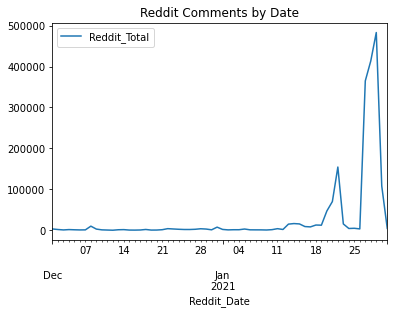

In [22]:
# Plot Stock information by Date
print(f"Bar graph for Reddit Posts by Date\n\n") 
Reddit_Data_Graph = Reddit_Analysis_df.plot(y="Reddit_Total", title=f"Reddit Comments by Date")
# Reddit_Data_Graph = Reddit_Analysis_df.plot(x='Reddit_Date', y="Reddit_Total", title=f"Reddit Comments by Date")

# Write out to png file
plt.savefig(os.path.join(Output_Data_Path_Folder,'Reddit_Msg_By_Date.png'))
plt.show()